# Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [2]:
data = pd.read_csv('./Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021.csv')
data.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3


# Memfilter Data

In [3]:
data1 = pd.DataFrame(data,columns=['pm10','pm25','so2','co','o3','no2','categori'])
data1

,pm10,pm25,so2,co,o3,no2,categori
0,43,NaN,58,29,35,65,SEDANG
1,58,NaN,86,38,64,80,SEDANG
2,64,NaN,93,25,62,86,SEDANG
3,50,NaN,67,24,31,77,SEDANG
4,59,NaN,89,24,35,77,SEDANG
...,...,...,...,...,...,...,...
360,75,121.0,61,23,40,47,TIDAK SEHAT
361,59,89.0,53,16,34,33,SEDANG
362,61,98.0,54,15,37,29,SEDANG
363,60,102.0,53,17,38,44,TIDAK SEHAT


In [4]:
data1.isna().sum()

pm10         0
pm25        31
so2          0
co           0
o3           0
no2          0
categori     0
dtype: int64

In [5]:
data1['pm25'].fillna(data1['pm25'].mean(), inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      365 non-null    int64  
 1   pm25      365 non-null    float64
 2   so2       365 non-null    int64  
 3   co        365 non-null    int64  
 4   o3        365 non-null    int64  
 5   no2       365 non-null    int64  
 6   categori  365 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 20.1+ KB


In [6]:
data2 = data1
le = LabelEncoder()
data2.categori = le.fit_transform(data2.categori)
data2


,pm10,pm25,so2,co,o3,no2,categori
0,43,94.694611,58,29,35,65,1
1,58,94.694611,86,38,64,80,1
2,64,94.694611,93,25,62,86,1
3,50,94.694611,67,24,31,77,1
4,59,94.694611,89,24,35,77,1
...,...,...,...,...,...,...,...
360,75,121.000000,61,23,40,47,2
361,59,89.000000,53,16,34,33,1
362,61,98.000000,54,15,37,29,1
363,60,102.000000,53,17,38,44,2


In [7]:
X=data2.iloc[:,0:5].values
y=data2.iloc[:,-1].values

In [8]:
# cols = X.columns

scaled_data = X
preprocessor = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_data = preprocessor.fit_transform(scaled_data)
print(scaled_data)

[[0.15       0.43755043 0.23595506 0.55       0.11450382]
 [0.24375    0.43755043 0.5505618  0.775      0.33587786]
 [0.28125    0.43755043 0.62921348 0.45       0.32061069]
 ...
 [0.2625     0.46099291 0.19101124 0.2        0.12977099]
 [0.25625    0.4893617  0.17977528 0.25       0.13740458]
 [0.28125    0.40425532 0.16853933 0.925      0.12977099]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.4, random_state=24)

## Data Training

In [10]:
print(X_train)

[[0.16875    0.23404255 0.1011236  0.05       0.3129771 ]
 [0.35       0.67375887 0.16853933 0.425      0.23664122]
 [0.36875    0.73049645 0.06741573 0.325      0.10687023]
 ...
 [0.26875    0.42553191 0.16853933 0.125      0.33587786]
 [0.2        0.28368794 0.11235955 0.175      0.16030534]
 [0.28125    0.18439716 0.16853933 0.05       0.18320611]]


In [11]:
print(y_train)

[1 2 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1
 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 2 2 2 1 2 1 1 0 2 1 2 1 1 2 2 2 1 2 1 2 1 2
 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 2 2 1 1
 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 1 1 2 1
 1 2 2 2 1 2 2 2 1 1 0 1 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 2 2 2 1 1 2 2 1 1
 1 1 1 2 1 2 2 2 2 1 2 1 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1]


## Data Testing

In [12]:
X_test

array([[0.21875   , 0.31914894, 0.33707865, 0.225     , 0.27480916],
       [0.15      , 0.21276596, 0.03370787, 0.1       , 0.16793893],
       [0.3375    , 0.44680851, 0.05617978, 0.175     , 0.29770992],
       [0.05625   , 0.13475177, 0.04494382, 0.1       , 0.17557252],
       [0.10625   , 0.19858156, 0.14606742, 0.025     , 0.20610687],
       [0.26875   , 0.54609929, 0.25842697, 0.1       , 0.33587786],
       [0.21875   , 0.41843972, 0.14606742, 0.05      , 0.24427481],
       [0.21875   , 0.29787234, 0.20224719, 0.1       , 0.23664122],
       [0.2125    , 0.29078014, 0.26966292, 0.1       , 0.28244275],
       [0.26875   , 0.40425532, 0.30337079, 0.2       , 0.22900763],
       [0.25      , 0.30496454, 0.05617978, 0.2       , 0.26717557],
       [0.28125   , 0.59574468, 0.16853933, 0.1       , 0.29770992],
       [0.30625   , 0.4893617 , 0.15730337, 0.075     , 0.26717557],
       [0.225     , 0.39716312, 0.11235955, 0.15      , 0.2519084 ],
       [0.29375   , 0.42553191, 0.

In [13]:
print(y_test)

[1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 2 2 1 2 2 1 2 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 2 1 2 0 1 2 2 1
 2 1 2 1 1 1 2 1 1 2 1 2 1 1 2 2 1 2 1 1 2 2 1 1 1 2 1 2 2 1 1 1 2 2 2 1 1
 1 2 1 1 1 2 2 2 1 1 2 2 1 2 2 1 2 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 2 2 1]


# Membuat Fungsi LVQ FIT

In [74]:
def lvq_fit(train, target, learn_rate, b, treshold):
# def lvq_fit(train, target, learn_rate, b, max_epoch):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)
    print(weight)
    train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx], dtype=object)
    train, target = train[:,0], train[:,1]
    epoch = 0
    
    while (learn_rate > treshold) :
    # while (epoch < max_epoch) :
        for i, x in enumerate(train):
            distance = [np.sqrt(sum((w-x)**2))for w in weight]
            # print(distance)
            min = np.argmin(distance)
            sign = 1 if target[1] == label[min] else -1
            weight[min] += sign * learn_rate * (x - weight[min])
        learn_rate -= b*learn_rate
        epoch += 1
        print(f"learning rate: {learn_rate}")
        print(f"weight: \n {weight} \n")
    return weight, label

# Membuat Fungsi LVQ Predict

In [15]:
def lvq_predict(x, weight):
    weight, label = weight
    d = [np.sqrt(sum((w-x)**2))for w in weight]

    return label[np.argmin(d)]

# Training & Testing

In [79]:
train = X_train
target = y_train

weight = lvq_fit(train, target, learn_rate=0.01, b=0.5, treshold=0.001)
# weight = lvq_fit(train, target, learn_rate=0.1, b=0.4, max_epoch=100, treshold=0.0001)

y_pred = list()
for x in X_test:
    output = lvq_predict(x, weight)
    y_pred.append(output)


print(f"prediksi: \n{y_pred}")

[[0.0625     0.08510638 0.05617978 0.         0.16030534]
 [0.16875    0.23404255 0.1011236  0.05       0.3129771 ]
 [0.35       0.67375887 0.16853933 0.425      0.23664122]]
learning rate: 0.006
weight: 
 [[ 0.05729057  0.07244871  0.05714916 -0.01699087  0.15750871]
 [ 0.22850098  0.37210022  0.1558914   0.14244187  0.24104969]
 [ 0.3759979   0.76183412  0.10919959  0.48843366  0.24366836]] 

learning rate: 0.0036
weight: 
 [[ 0.05172092  0.06002714  0.05755623 -0.03175434  0.15461728]
 [ 0.24919085  0.41930456  0.17490109  0.1782383   0.2270757 ]
 [ 0.37945568  0.78150402  0.08506304  0.49718992  0.24400756]] 

learning rate: 0.0021599999999999996
weight: 
 [[ 0.04751723  0.05031399  0.05758107 -0.04213637  0.15176305]
 [ 0.25569361  0.43248924  0.18161516  0.19186948  0.22393557]
 [ 0.3808146   0.78925482  0.07427988  0.50279605  0.24406223]] 

learning rate: 0.0012959999999999998
weight: 
 [[ 0.04454213  0.04370349  0.0575015  -0.04913379  0.14973912]
 [ 0.25855479  0.43814071  0.

# Menghitung Akurasi

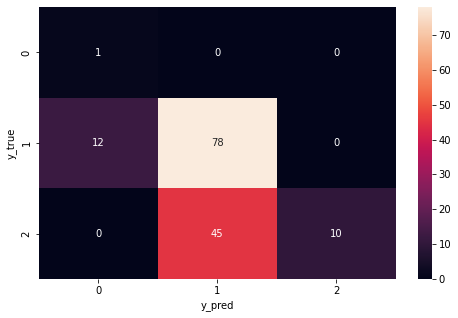

In [80]:
confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.08      1.00      0.14         1
           1       0.63      0.87      0.73        90
           2       1.00      0.18      0.31        55

    accuracy                           0.61       146
   macro avg       0.57      0.68      0.39       146
weighted avg       0.77      0.61      0.57       146

